# Homework 8: Linear regression and least-squares optimization
# 60 pts, Due Thursday May 27 at 11:59pm 

# **Helpful Resources:**# 

- [Getting help on a Jupyter Notebook](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/)

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands (worth returning to throughout this course)




## *This week's* homework groups. 

Homework groups this week are:
```
[Kei Anton] [Michael Skyler Riely] [Sophie Alex]

```

You will need to work collaboratively with your group.

### Question 0: Setup. 
This week I would like one member of the group, who will be owner of the shared repository, to make a `pten` folder inside this hw08 folder and initialize it as a Git repository. This folder should have (1) `regression_fxns.py` ,(2)`pten.csv`, and (3) a distinct version of `hw08_<last name>.ipynb`, saved with a user-specific name (e.g. `hw08_warren.ipynb`)

The owner should invite other members as collaborators via Github. The shared Git repository will have *.ipynb* files for each user but one `regression_fxns.py` file that is called by each of the user-specific, Jupyter notebook files.

As described below, `regression_fxns.py`, when completed, will contain three functions: <br>
`make_standard_units`<br>
`calc_corrcoef_from_standardized_input`<br>
`get_regression_parameters`<br>





### Question 1:
This week you will examine data from the Cancer Cell Line Encyclopedia -- discussed in this [paper](https://www.nature.com/articles/s41586-019-1186-3). You can examine data at this online portal [here](https://portals.broadinstitute.org/ccle).

The file `pten.csv` contains expression data in ~1000 cell lines for the PTEN gene. This gene suppresses tumors; mutations in the gene are associated with many types of cancer. A cell line is group of cells that are kept alive and replicate indefinitely in culture.

`pten.csv` contains four columns:`Cell Line` (the cell line type), `Copy Number` (technically the log-2 copy ratio. A value of 0 corresponds to no variation in copy number from reference; negative values are decreases in copy number, whereas positive values are increases), `mRNA Expression (Affy)` (mRNA expression measured by Affymetrix microarrays), and `mRNA Expression (RNAseq)` (mRNA expression measured by RNAseq).

For purposes of exploratory visualization, load the data into Pandas and make three scatter plots, where each point in plot reflects paired data for a specific cell line: <br>For first scatter plot, put copy number on horizontal axis, Affy mRNA data on vertical axis. <br>For second, Copy number on horizontal axis, RNAseq expresssion data on vertical axis. <br> For third, Affy mRNA data on horizontal axis and RNAseq mRNA on vertical axis) <br>
**Make sure you label your axes to distinguish plots.**
## Answer 1:

Text(0, 0.5, 'mRNA Expression (RNAsSeq)')

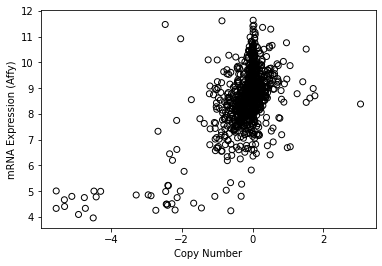

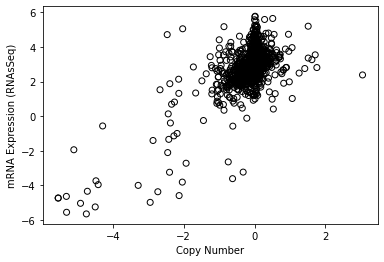

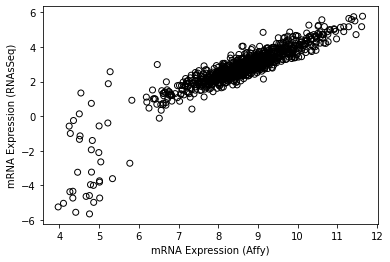

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('pten.csv')
df.columns = ['cell_line','copy_number','affy','rnaseq']

plt.scatter(df['copy_number'],df['affy'], facecolor = 'none',edgecolor = 'k')
plt.xlabel('Copy Number')
plt.ylabel('mRNA Expression (Affy)')

plt.figure()
plt.scatter(df['copy_number'],df['rnaseq'], facecolor = 'none',edgecolor = 'k')
plt.xlabel('Copy Number')
plt.ylabel('mRNA Expression (RNAsSeq)')

plt.figure()
plt.scatter(df['affy'],df['rnaseq'], facecolor = 'none',edgecolor = 'k')
plt.xlabel('mRNA Expression (Affy)')
plt.ylabel('mRNA Expression (RNAsSeq)')


### Question 2: 
In class we reviewed a method for manually calculating correlation coefficient by first converting data to *standard units*, where the mean of the data is 0, and the standard deviation is 1. 

In `regression_fxns.py`, write `make_standard_units` function, which will take a data array as input and return a data array of the same size in standard units.  If your collaborator has already written a working version of this function, review it and add a comment.

Call this function to create three numpy arrays of standardized data: `copy_su`, `affy_ru`, `rseq_su`, corresponding to the data plotted in above scatter plots.

Remake the scatter plots below with the standardized data.

### Answer 2:




In [10]:
# both collaborators already finished functions, writing own here for practice

def make_standard_units(array):
    mn_sub = array - np.mean(array)
    norm_array = mn_sub/np.std(array)
    return norm_array

copy_su = make_standard_units(df['copy_number'])
affy_su = make_standard_units(df['affy'])
rseq_su = make_standard_units(df['rnas'])


### Question 3: 
In class, we learned that when paired data are in standard units, Pearson's correlation coefficient, which gives the slope of the best fit line, can be calculated as the mean of the point-by-point product of the data.
In `regression_fxns.py`, write `calc_corrcoef_from_standardized_input` function that takes in two data arrays in standard units and returns Pearson's correlation coefficient.
## Answer 3:
Work or comment on `regression_fxns.py`


### Question 4: 
Let's look more closely at the relationship between Affymetrix mRNA expression (`mRNA Expression (Affy)`) and RNAseq mRNA expression (`mRNA Expression (RNAseq)`). Write a function in`regression_fxns.py` called `get_regression_parameters` that returns parameters of the regression line as a two item array with slope and intercept as first and second elements respectively. `get_regression_parameters` should call `make_standard_units` and `calc_corrcoef_from_standardized_input` functions.<br><br>
Remember that the slope of the regression line is `correlation_coefficient * (sd(y)/sd(x))`.
The intercept can be calculated from the equation of a line using the mean of the data and the slopes `meany = slope * meanx + intercept`

In cell below, use this function to calculate slope and intercept of regression line for original scatter plot in which Affymetrix mRNA expression is on horizontal axis and RNAseq data on vertical axis. Remake this scatter plot and overlay the regression line.
Print out slope and intercept.

### Answer 4


In [11]:
# Answer 4

### Question 5: 

The oldest and most commonly used cell line in Biology is the HeLa cell line, named after Henrietta Lacks, whose cervical cancer cells were taken in 1951 without her consent. The [Immortal Life of Henrietta Lacks](https://en.wikipedia.org/wiki/The_Immortal_Life_of_Henrietta_Lacks) was a 2011 book about this. There is also information about this story at this [Johns Hopkins University site](https://www.hopkinsmedicine.org/henriettalacks/). 

The HeLa cell line is missing from our dataset. If we know that the HeLa Affymetrix mRNA Expression  value is 8.2, what is the predicted RNAseq value for this cell line using regression parameters calculated above. Remake scatter plot of original data, adding a marker with different color for predicted HeLA value.
### Answer  5: 

In [3]:
# Your calculation and plot for Answer 5

### Question 6: 
Use a bootstrap approach to estimate a 95% confidence interval for the HeLA predicted RNAseq value. You should resample the observed paired data `mRNA Expression (Affy)` and `mRNA Expression (RNAseq)` with replacement (e.g. 1000 times). Each time calculate a regreession and generate a HeLa prediction value.

Plot the distribution of all predicted HeLA RNAseq values as a histogram as well your 95% confidence interval. Print your 95% confidence interval.<br>
*Hint:* Remember that the bootstrap should preserve specific x,y pairs but resample with replacement which pairs are used for making the regression.

### Answer 6:

## Calculating regression parameters using least-squares optimization
### Question 7a:

As we discussed in class, a general way to fit models (not just lines) to data is to use least-squares optimization. To practice this, we will determine the best fitting line using least squares optimization.

In cell below, define a function called `calc_RMSE_aff_rnaseq` which calculates the root mean square error of the paired affy, rnaseq data relative to a linear model
### Answer 7a:

In [4]:
import numpy as np
def calc_RMSE_aff_rnaseq(line_parameters):
    '''INPUT: array line_parameters, where line_parameters[0] is slope and line_parameters[1] is intercept
       OUTPUT: calculated_RMSE, a number.
       Note that the observed raw affymetrix data and RNAseq data should be referenced in this function
    '''
    ...
#test for a flat line with intercept of 0, where RMSE should be sum of squares of y-data   
line_parameters=np.array([0,0])
RMSE_test=calc_RMSE_aff_rnaseq(line_parameters)

### Question 7b: Optimization
Python has excellent tools to perform automated optimization, which is central to machine learning.
Use the `scipy.optimize.minimize` function to determine which line parameters obtain a minimum value of RMSE

Note that this [minimize function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) requires at least two inputs: The Objective function to be minimized, which will be your `calc_RMSE_aff_rnaseq` function as well as an input array, which is initial guess at the input_parameters to objective function.

Note that the slope and intercept of optimized fit should closely match the regression line calculated earlier. If not, this indicates a problem with at least one of the two analyses.

In [5]:
#Answer 7b


calculated_slope=...
calculated_intercept=...

## Question 8: Setting up Python and Git on your personal computers. 
If you don't have Python on your own computer, please try to install it this week and let me know if you run into issues. The [Anaconda Individual Edition](https://www.anaconda.com/products/individual) is a great distribution, which includes Jupyter Notebook as well as many Python packages we have used.  Also try to set up Git application on your personal computer. Installing [GitHub Desktop](https://desktop.github.com/) will install latest version of Git if you don't have it on your personal machine.

